# **Housing Price Prediction using Linear Regression**

## Importing necessary libraries

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Importing data

In [176]:
data = pd.read_csv('housing_price.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [177]:
data.shape

(506, 14)

## Checking for NULL values

In [178]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Filling NULL values

In [179]:
data['AGE'].fillna(data['AGE'].mean(), inplace = True)
data['CHAS'].fillna(data['CHAS'].mode()[0], inplace = True)

## Dropping NULL values

In [180]:
data.dropna(inplace = True)

In [181]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [182]:
data.shape

(429, 14)

## **Exploratory Data Analysis**

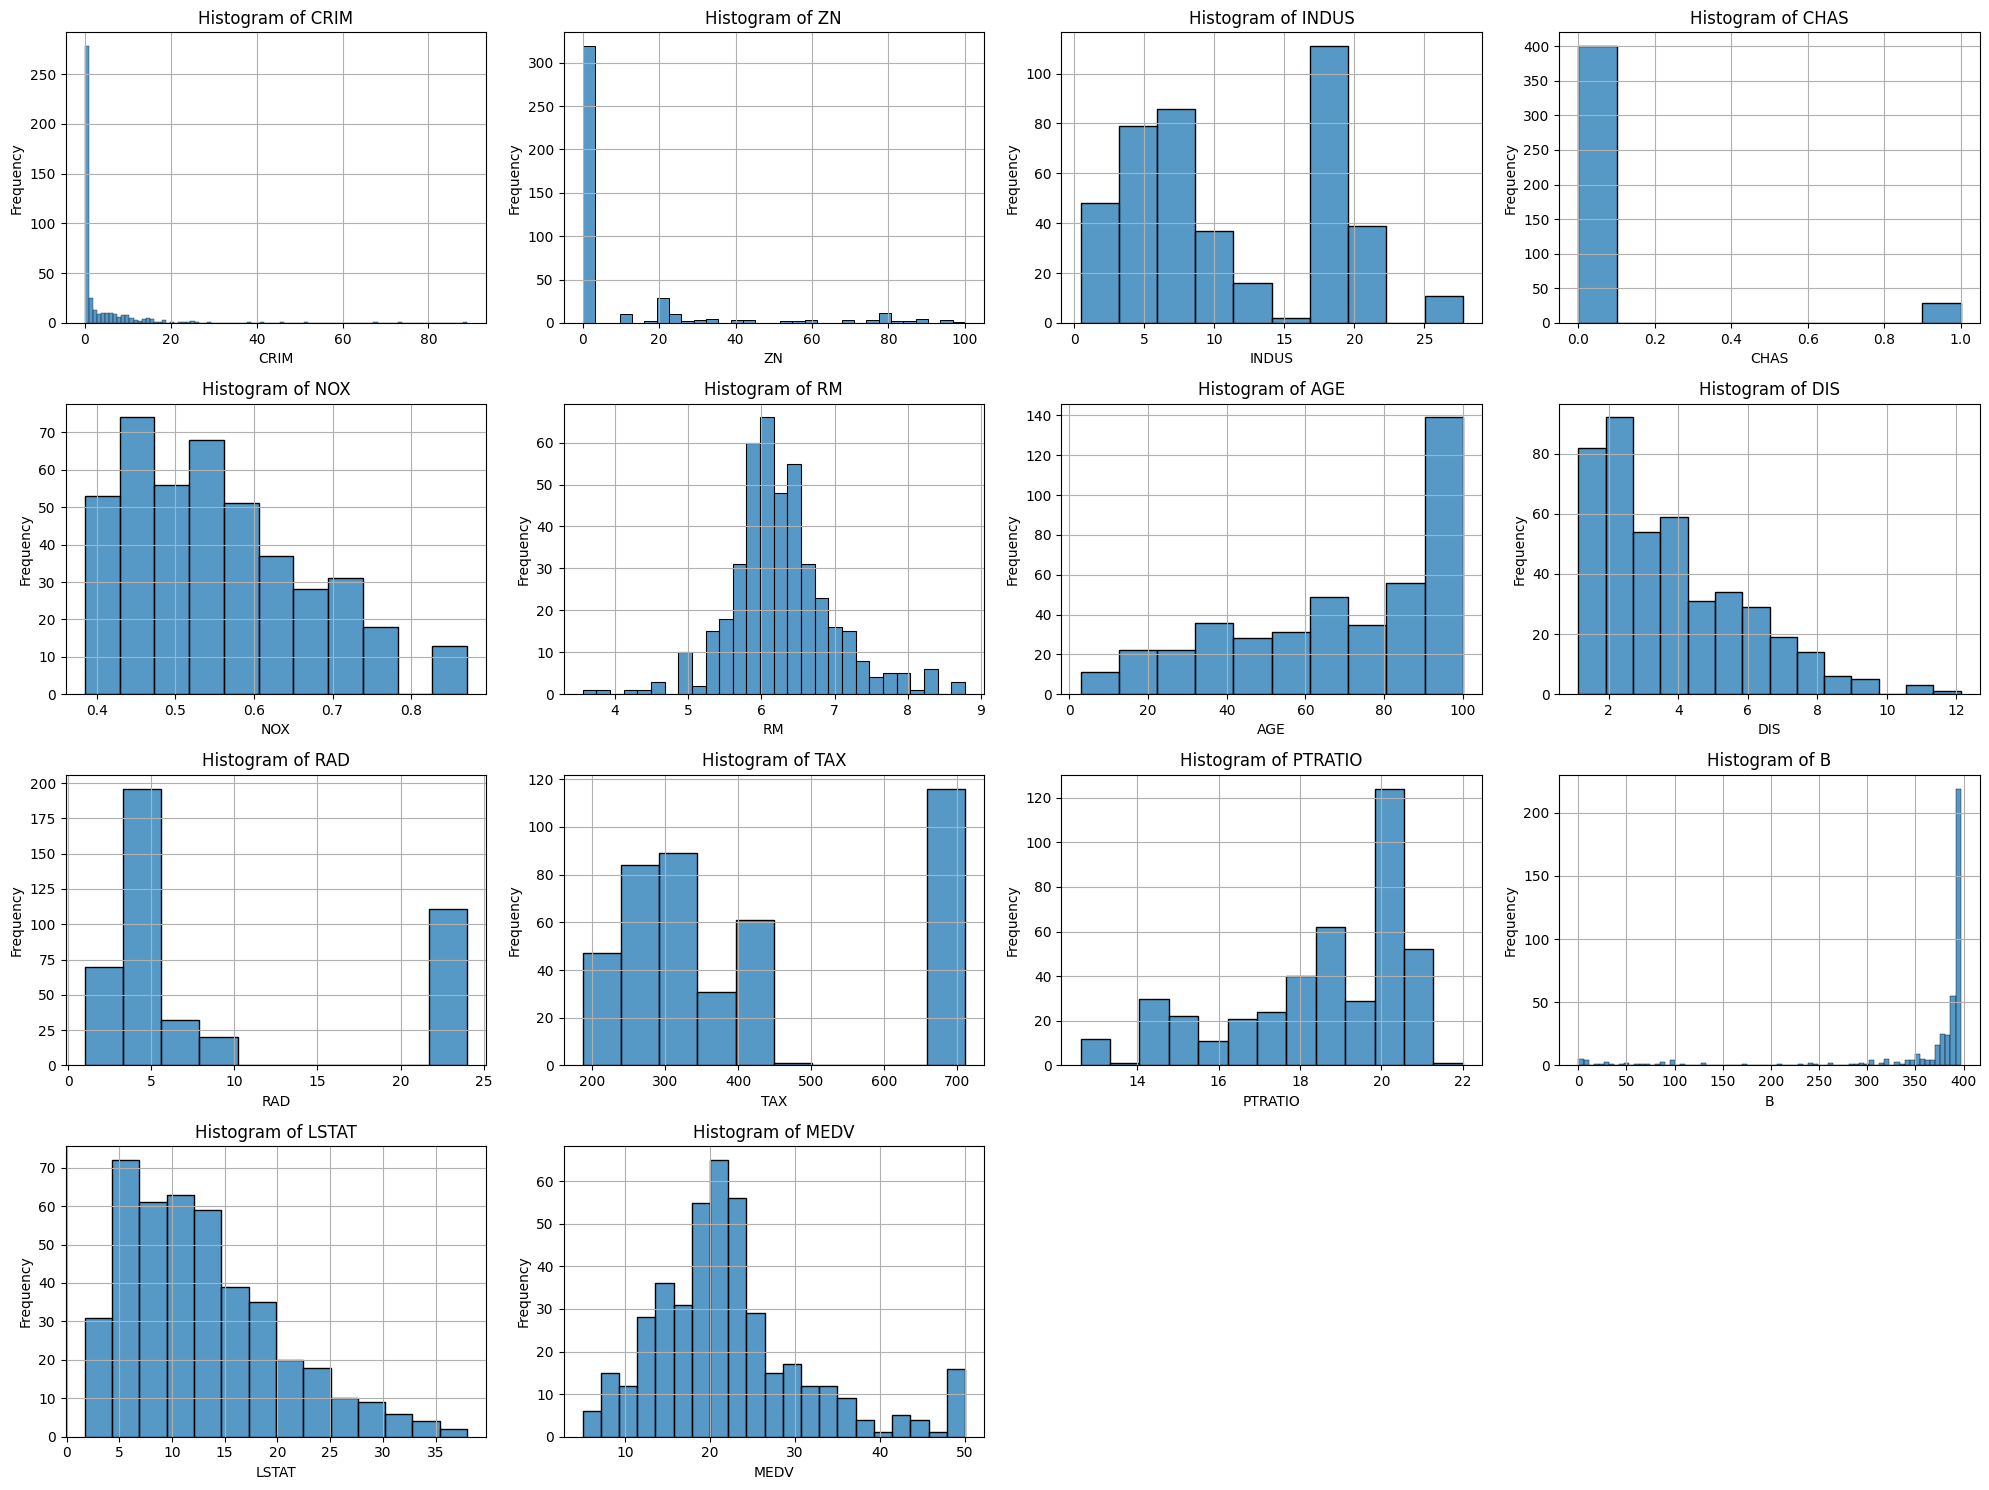

In [183]:
# Set the number of columns for the grid
num_cols = 4  # Change this value according to the number of features you want to display in each row

# Calculate the number of rows needed based on the number of features and the number of columns
num_features = len(data.columns)
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide empty subplots
for j in range(num_features, num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

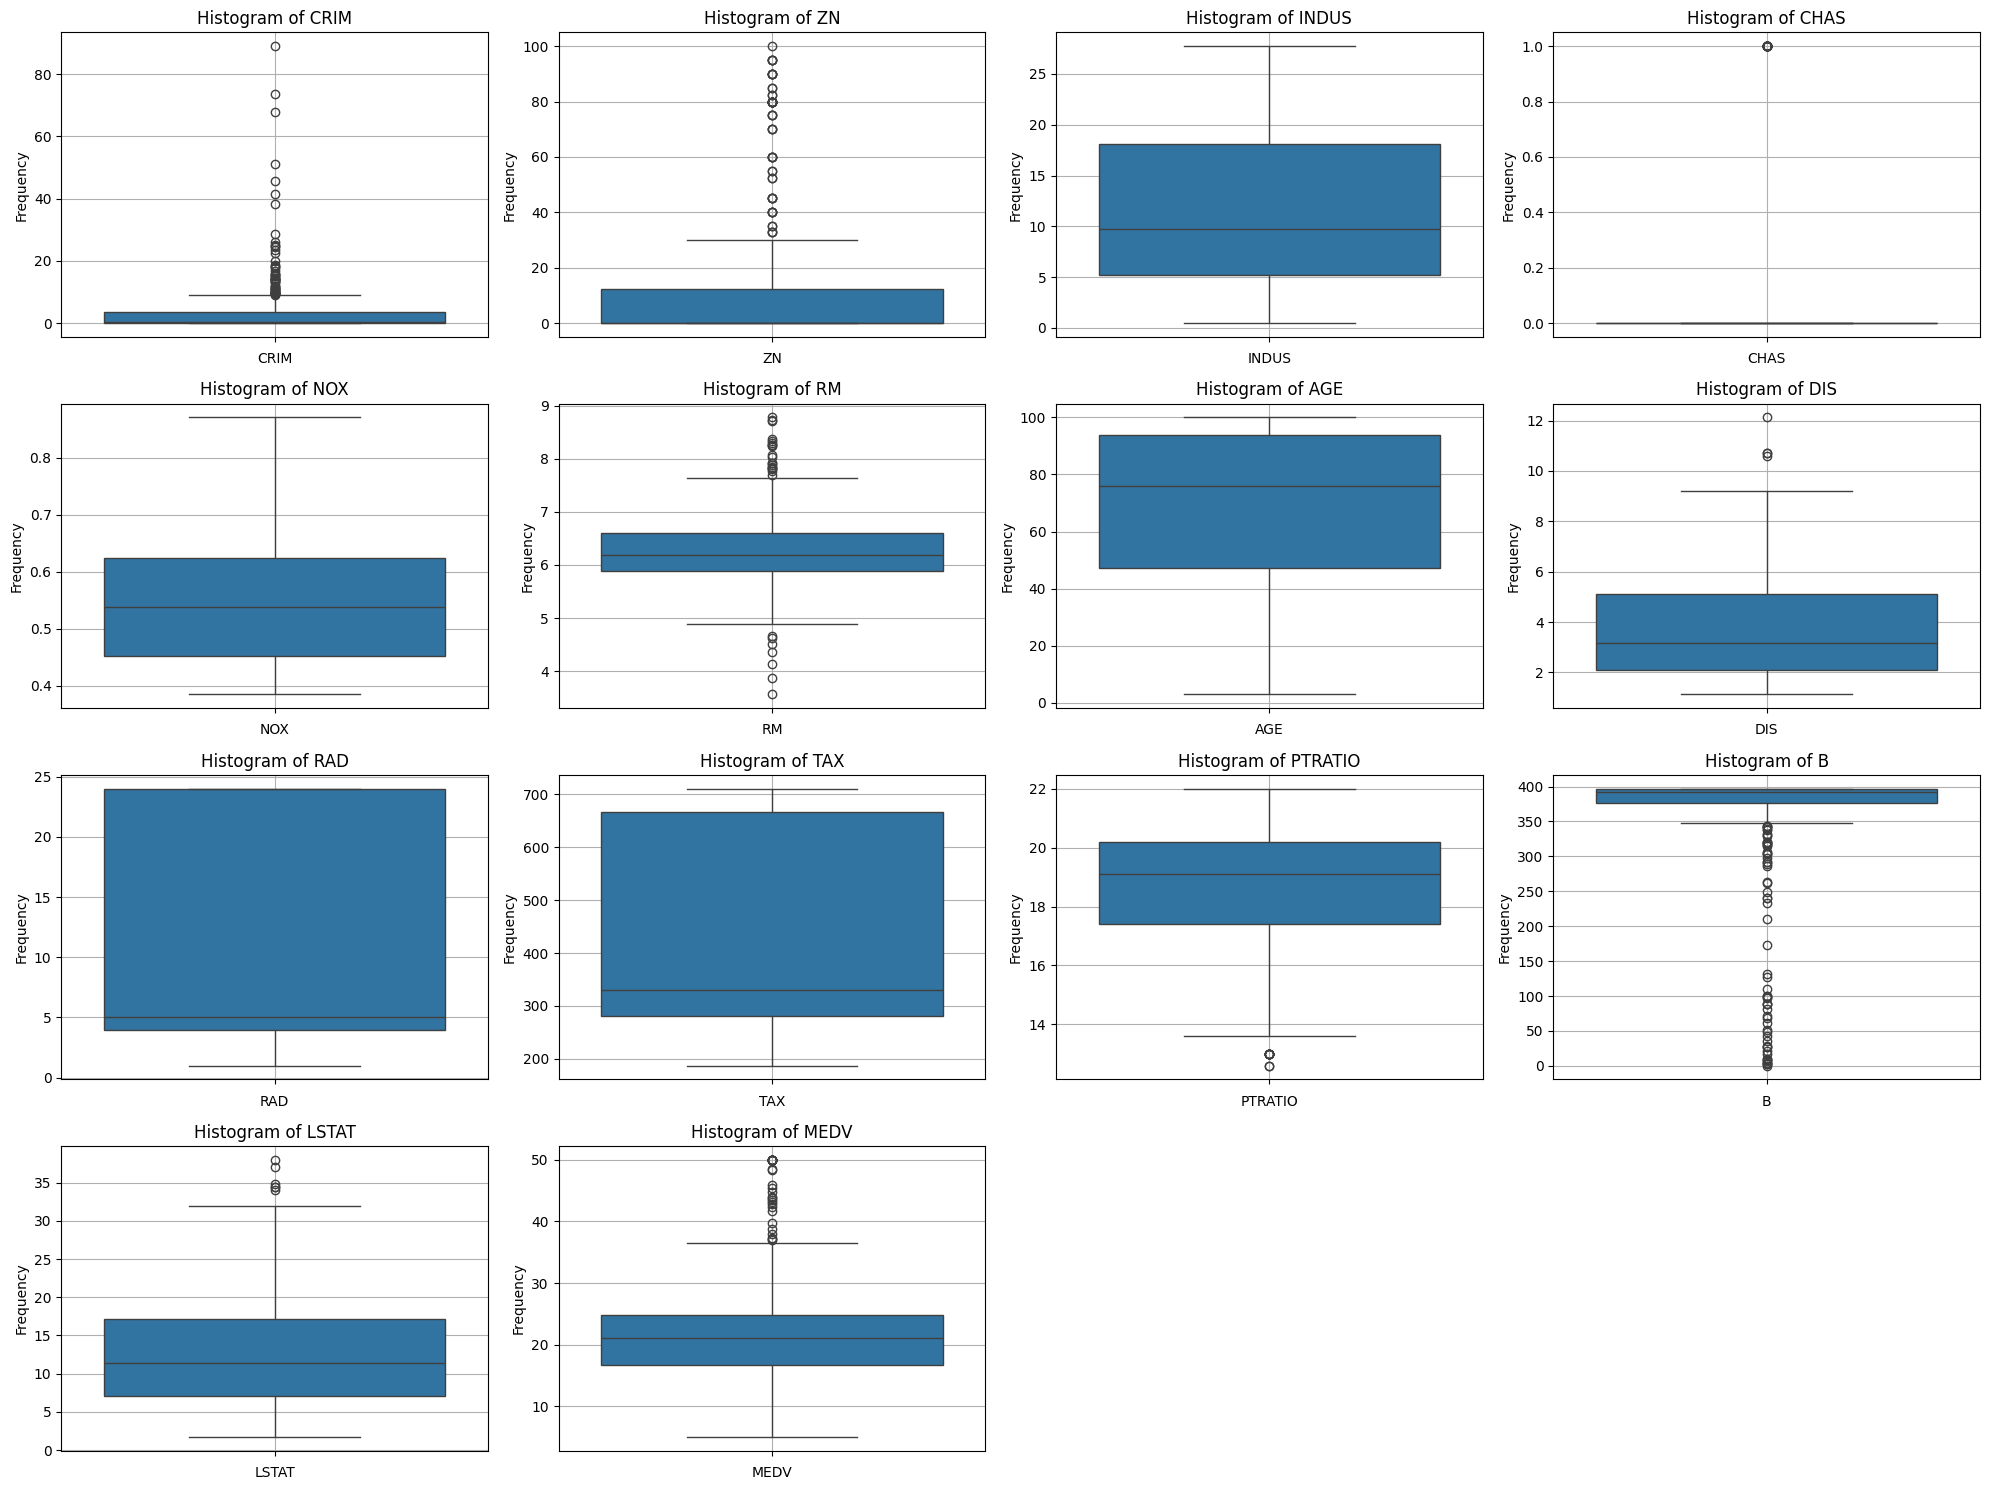

In [184]:
# Set the number of columns for the grid
num_cols = 4  # Change this value according to the number of features you want to display in each row

# Calculate the number of rows needed based on the number of features and the number of columns
num_features = len(data.columns)
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide empty subplots
for j in range(num_features, num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## **Standardizing Data**

In [185]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## Removing Outliers

In [186]:
#Removing outliers using lower and upper bound
def remove_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [187]:
for column in data.columns:
    data[column] = remove_outliers_iqr(data[column])

In [188]:
data.isnull().sum()

CRIM       56
ZN         53
INDUS       0
CHAS       29
NOX         0
RM         27
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO    12
B          65
LSTAT       6
MEDV       32
dtype: int64

In [189]:
data['AGE'].fillna(data['AGE'].mean(), inplace = True)
data['CHAS'].fillna(data['CHAS'].mode()[0], inplace = True)
data.dropna(inplace = True)

In [190]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## **Splitting Input and Output Data**

In [191]:
features = data.drop(columns = ['MEDV'])
output = data['MEDV']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size = 0.2)

## **Linear Regression Model**

In [193]:
model = LinearRegression()

## Training the model

In [194]:
model.fit(X_train, y_train)

LinearRegression()

## Testing the model

In [195]:
y_pred = model.predict(X_test)

## Performance Metrics

In [197]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.22178134487655005
Mean Squared Error (MSE): 0.07935252084745505
Root Mean Squared Error (RMSE): 0.2816957948700247
R-squared (R2): 0.5322698249411171
